# Data visualization 002

## Bivariate plotting

- importez `pandas` en tant que `pd` :

In [43]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16,8)

- ajoutez la ligne qui permet d'afficher les graphes dans Jupyter notebook :

In [2]:
%matplotlib inline

- importez `data/winemag-data_first150k.csv` sans la colonne index :

In [3]:
df = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


- calculez le nombre de valeurs nulles (NaN) pour chaque colonne :

In [4]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

### Scatter plot

- tracez un **scatter plot** avec le `price` en abscisse, les `points` en ordonnée :

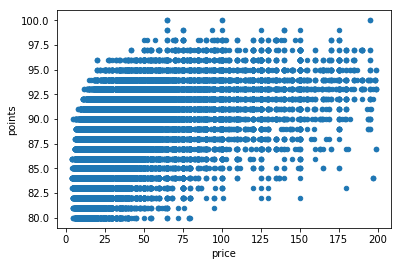

In [5]:
#df.plot.scatter(x='price', y='points') #nuage de points
df[df['price']<200].plot.scatter(x='price', y='points')

- quel type de donnée pouvons-nous visualiser avec un scatter plot ? Donnez un exemple.

### Hexplot

- tracez un **hexplot** avec le `price` en abscisse, les `points` en ordonnée :

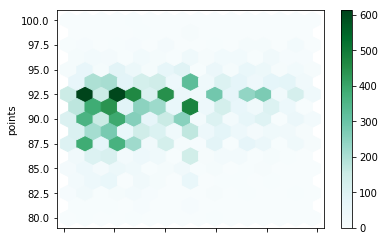

In [6]:
df[(df['price']<100) & (df['price']>50)].plot.hexbin(x='price', y='points', gridsize=15)

- quel type de donnée pouvons-nous visualiser avec un hexplot ? Donnez un exemple.

### Stacked plots

- petite manipulation `pandas` 😈 : créez un nouveau `DataFrame` qui aura en colonne les 5 variétés de vins (`variety`) les plus récurrents dans le dataset, en index les notes (`points`) et en valeurs le nombre de fois qu'on a compté ce type de vin pour cette note. Une image vaut mieux que mille mots :

![](misc/002_dataframe_5wines.png)

Vous avez ci-dessus un screenshot des 5 premières lignes du `DataFrame`. N'hésitez pas à afficher votre œuvre une fois que vous aurez réussi !

In [7]:
df1 = pd.DataFrame(dtype='int8')
variety = sorted(list(df['variety'].value_counts()[:5].index))
'''
for i in variety:
    df1[i] = df[df['variety']==i]['points'].value_counts().sort_index()#.fillna('NAN', inplace=True)
df1.head()
'''
# df[df['variety'].isin(variety)].groupby('variety')['points'].value_counts().unstack(level=0).info()
df[df['variety'].isin(variety)].groupby('points')['variety'].value_counts().unstack()

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,86.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


- faites un bar plot en stackant les valeurs :

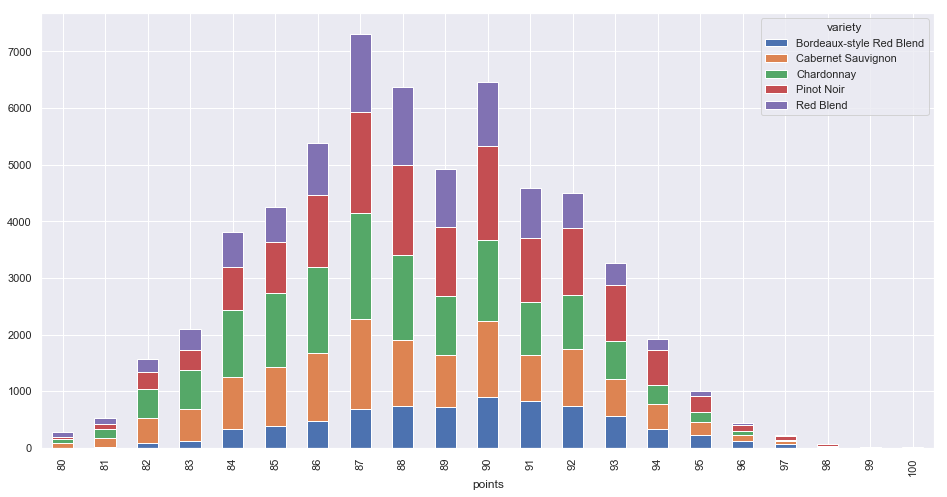

In [53]:
df[df['variety'].isin(variety)].groupby('points')['variety'].value_counts().unstack().plot.bar(stacked=True)

- faites un area plot : # c'est pour voir l'évolution des données (series temporelle), des donnés sont stacked

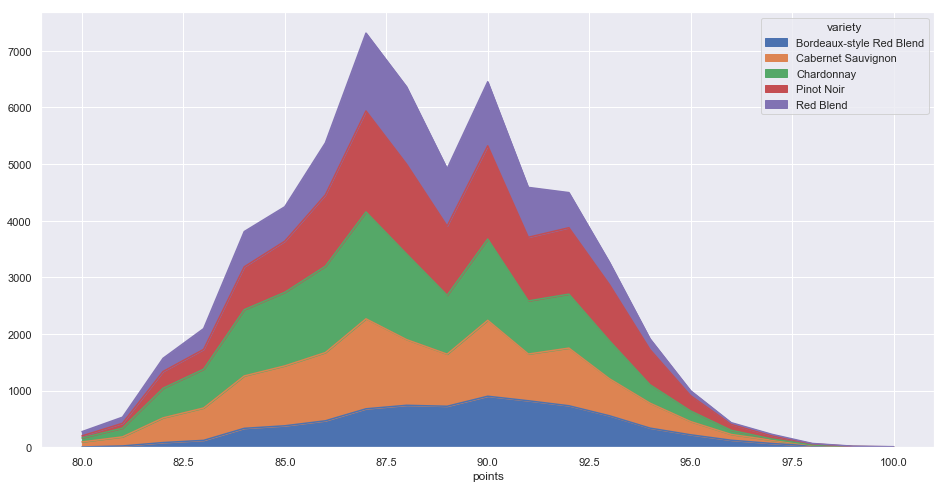

In [54]:
df[df['variety'].isin(variety)].groupby('points')['variety'].value_counts().unstack().plot.area()

### Bivariate line chart

- tracez un line chart :

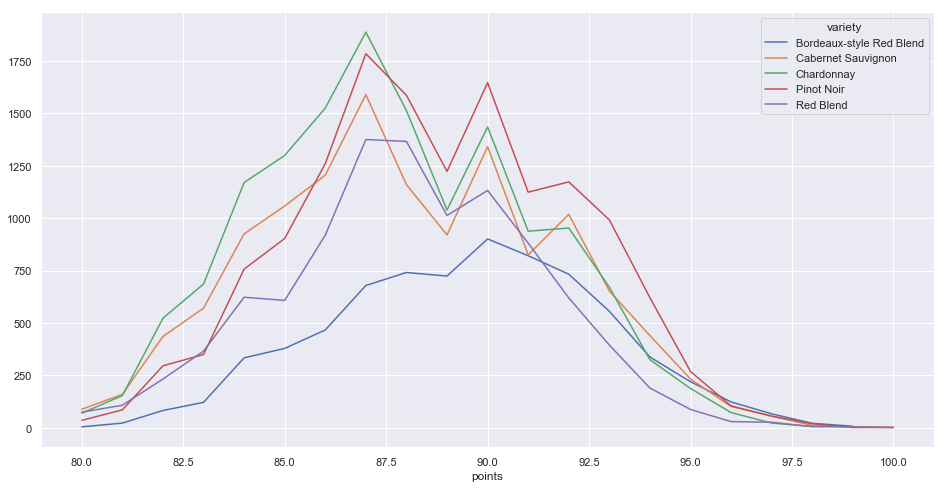

In [55]:
df[df['variety'].isin(variety)].groupby('points')['variety'].value_counts().unstack().plot.line()

## Seaborn

Nous allons maintenant utiliser une nouvelle librairie : **Seaborn**. Cette librairie est plus moderne que celle utilisée par Pandas (Matplotlib) et elle peut prendre des `DataFrame` en argument.

- importez `seaborn` en tant que `sns` :

In [52]:
import seaborn as sns
sns.set()

Éxécutez la ligne suivante :

In [12]:
sns.__version__

'0.9.0'

Si votre version de `seaborn` est inférieure à la version `0.9.0`, vous pouvez faire une mise à jour en utilisant Conda :

`conda install seaborn`

- si vous avez écrasé la variable, ré-importez `data/winemag-data_first150k.csv` sans la colonne index - sinon passez à la suite :

In [13]:
df = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)

- faites l'équivalent d'un bar chart avec `seaborn` (attention, c'est un nom différent sous `seaborn`) de `points` :

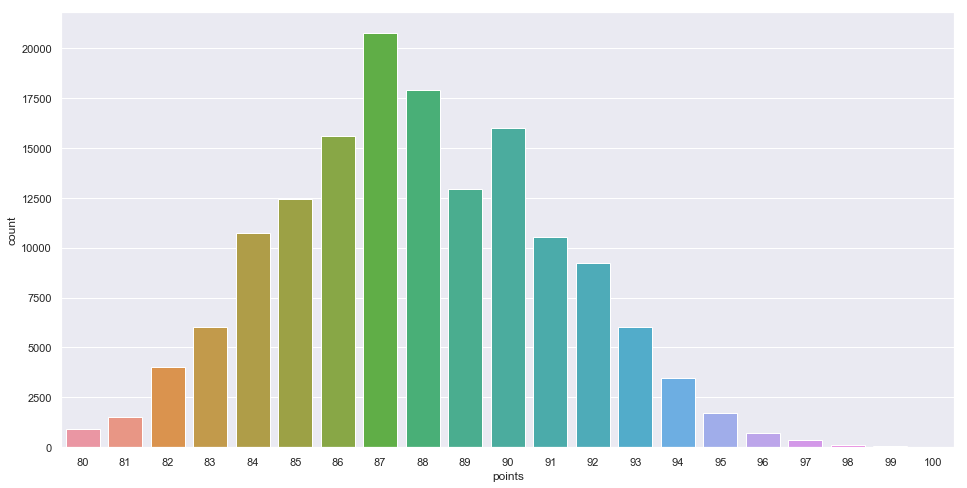

In [62]:
sns.countplot(df['points']) # bar chart
#sns.barplot(x=df['points'],y = df['points'].value_counts(sort=False))

- faites l'équivalent d'un line chart avec `seaborn` avec `points` en abscisse et le `price` en ordonnée :

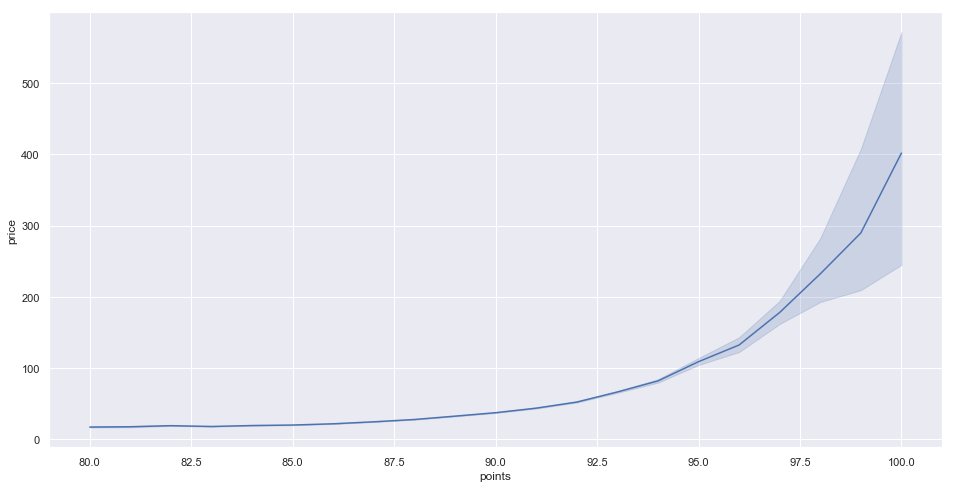

In [64]:
sns.lineplot(x='points', y='price', data=df)

- tracez l'équivalent d'un histogramme des `points` :

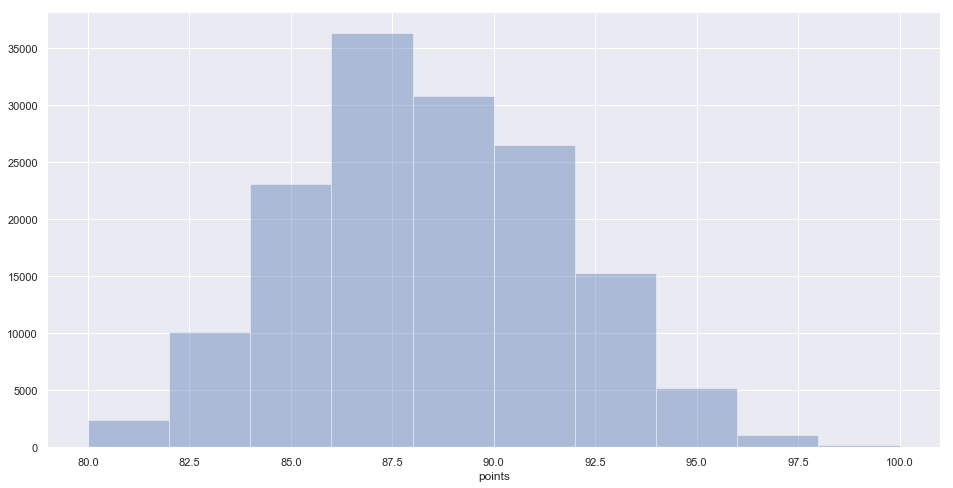

In [70]:
sns.distplot(df['points'],hist=True,kde=False, bins=10) #kde for gaussian kernel distribution estimate, pas intéressant dans le cadre discrètes
sns.distplot?

Il existe aussi d'autres types de graphiques que nous pouvons afficher avec `searborn`. Nous allons en découvrir quelques-uns.

### Joint plot

- Tracez un **joint plot** (l'équivalent d'un scatter plot dans Pandas) avec `price` en abscisse et `points` en ordonnée :

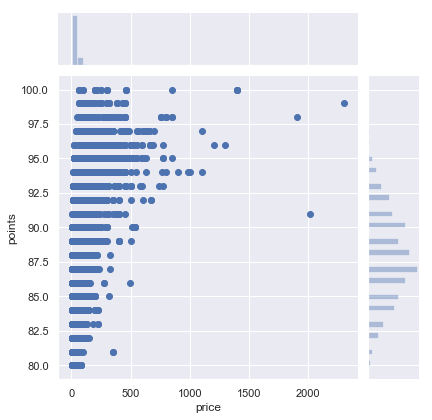

In [71]:
sns.jointplot(x='price', y='points', data=df)

- avec un `jointplot` vous pouvez aussi tracer un hexplot :

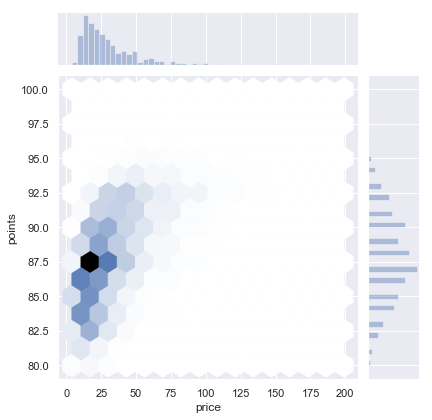

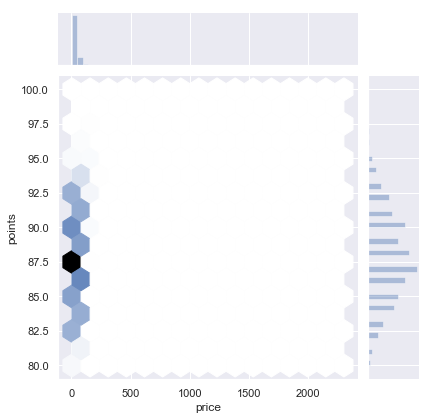

In [73]:
sns.jointplot(x='price', y='points', data=df[df['price']<200], kind='hex', gridsize=15)
sns.jointplot(x='price', y='points', data=df, kind='hex', gridsize=15)

_Là encore pourquoi ne pas limiter le nombre de données à afficher pour que ce soit plus explicite ?_

### Box plot

- donnez la liste des 5 premières variétés (`variety`) de vin (facile !) :

Vous devriez obtenir quelque chose comme :

```
Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')
```

In [76]:
fr5 = df['variety'].value_counts().head().index
fr5.head()

Index(['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend'],
      dtype='object')

- créez un `DataFrame` avec seulement les variétés faisant parti de la liste ci-dessus (re-facile !) :

In [86]:
f5 = df[df['variety'].isin(fr5)]
f5.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars


- tracez un **box plot** de ce nouveau `DataFrame`, avec `variety` en abscisse et `points` en ordonnée :

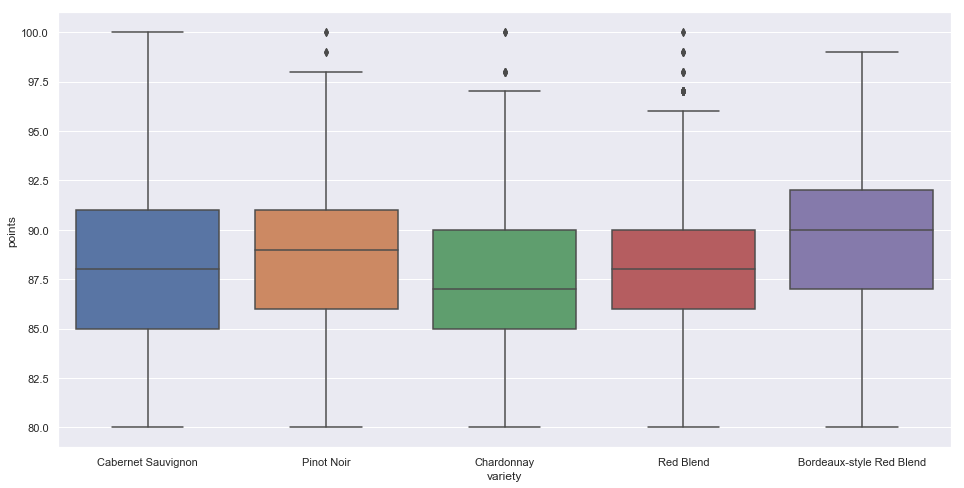

In [85]:
sns.boxplot(x='variety', y='points', data = f5)

_N'hésitez pas à regarder comment lire un box plot !_

### Violin plot

- tracez un **violin plot** des `points` en fonction des `variety` :

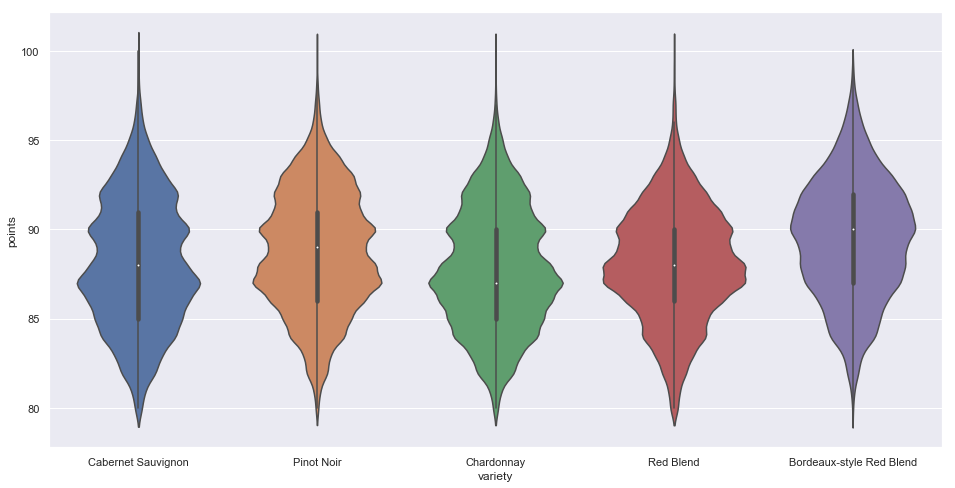

In [88]:
sns.violinplot(x='variety', y='points', data = f5)